In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pickle
import csv

In [80]:
data = np.loadtxt('data/train.txt', dtype=int, delimiter=',',skiprows=1)

In [3]:
timestamps = data[:,0]
data = data[:,1:]
orig_data = np.copy(data)

In [4]:
data[data == -1] = 0

In [5]:
sum_tot = np.sum(data,axis=1)

In [6]:
sum_tot

array([2, 2, 0, ..., 2, 0, 1])

In [7]:
sum_tot = np.reshape(sum_tot,(-1,30))

In [8]:
sum_tot.shape

(1440, 30)

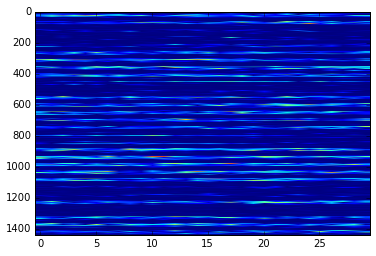

In [9]:
plt.imshow(sum_tot,aspect='auto')

In [10]:
timestamps[timestamps % 10000 == 1553]

array([ 11553,  21553,  31553,  41553,  51553,  61553,  71553,  81553,
        91553, 101553, 111553, 121553, 131553, 141553, 151553, 161553,
       171553, 181553, 191553, 201553, 211553, 221553, 231553, 241553,
       251553, 261553, 271553, 281553, 291553, 301553])

In [11]:
S1_0245 = data[timestamps % 10000==245,0]

In [12]:
S1_0245

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [13]:
S1_635 = data[timestamps%10000==635,0]

In [14]:
S1_635

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [15]:
sample_times = np.unique(timestamps%10000)

In [21]:
sum_tot_bySens = np.zeros((len(sample_times),data.shape[1]))
mean_tot_bySens = np.zeros((len(sample_times),data.shape[1]))

for i_sens in range(sum_tot_bySens.shape[1]):
    for i_time in range(len(sample_times)):
        
        cur_time = sample_times[i_time]
        temp = data[timestamps%10000==cur_time,i_sens]
        sum_tot_bySens[i_time,i_sens] = np.sum(temp)
        mean_tot_bySens[i_time,i_sens] = np.mean(temp)
        

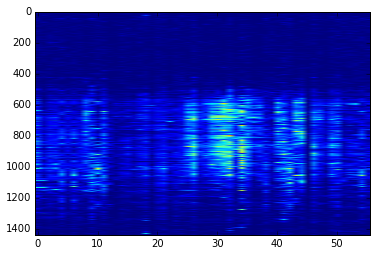

In [22]:
plt.imshow(sum_tot_bySens,aspect='auto')

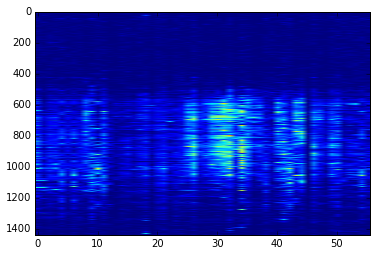

In [23]:
plt.imshow(mean_tot_bySens,aspect='auto')

In [4]:
x, y = np.genfromtxt('data/sensor-coordinates.txt',delimiter=',',skip_header=1,usecols=(1,2),unpack=True)

In [5]:
x, y

(array([ 116.66,  123.75,  102.49,  109.57,   60.44,   88.95,   60.44,
          95.4 ,   74.62,   59.81,   59.81,   81.86,   66.11,   81.07,
          73.36,   73.36,   73.36,   73.36,   73.36,   73.36,   73.36,
          73.36,   80.44,   87.53,   94.61,  101.7 ,  109.57,  109.57,
         109.57,  109.57,  109.57,  109.57,  116.03,  123.75,  119.65,
         133.19,  140.44,  147.52,   73.36,  154.61,  133.19,  133.19,
          73.36,   67.53,   60.44,  133.19,  109.57,  109.57,  109.57,
         109.57,  109.57,  101.7 ,   95.4 ,   88.16,   59.81,   73.36]),
 array([  76.02,   74.6 ,   74.6 ,   74.6 ,   82.38,   74.6 ,   90.17,
          74.6 ,   74.6 ,  105.74,  113.52,   74.6 ,  113.52,  183.57,
         190.65,  182.86,  175.08,  159.51,  151.73,  143.95,  136.16,
         128.38,  136.16,  136.16,  136.16,  136.16,  136.16,  143.95,
         128.38,  120.59,  112.81,  105.03,   97.95,   90.17,   83.09,
          81.32,   81.32,   81.32,  113.52,   81.32,   73.54,   65.76,
    

/Users/ta24418/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


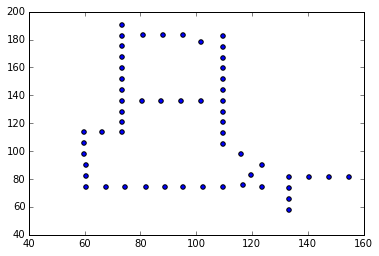

In [7]:
plt.scatter(x,y,c=data[0,1:],cmap=plt.cm.)
plt.show()

## Filling missing data based on temporal values (0 if time_index < 500, 1 (or spatial average) if between 500 and 1200, 0 if time_index > 1200) 

In [21]:
for i in range(data.shape[0]):
    cur_time = data[i,0] % 10000
    if cur_time < 820:
        np.place(data[i],data[i]==-1,0)
    elif (cur_time >= 820) & (cur_time < 2000):
        np.place(data[i],data[i]==-1,1)
    else:
        np.place(data[i],data[i]==-1,0)

In [76]:
def query_data(data, sensor, time_start, time_end):
    # Get starting index and ending index, derived from time_start and time_end
    st_day, en_day = time_start/10000, time_end/10000
    st_hour, en_hour = (time_start%10000)/100, (time_end%10000)/100
    st_min, en_min = time_start%100, time_end%100
    st_index = (st_day-1)*1440 + st_hour*60 + st_min
    en_index = (en_day-1)*1440 + en_hour*60 + en_min
    
    return np.sum(data[st_index:en_index+1,sensor])

In [79]:
with open('data/test.txt') as csvfile:
    reader = csv.reader(csvfile)
    reader.next()
    with open ('submission.txt', 'w') as f:
        counter = 1
        f.write('Index,Count\n')
        for row in reader:
            f.write('{},{}\n'.format(counter, query_data(data,int(row[0][1:]),int(row[1]),int(row[2]))))
            counter += 1

In [39]:
hours = []
with open('data/test.txt') as csvfile:
    reader = csv.reader(csvfile)
    reader.next()
    for row in reader:
        hours.append([int(row[1]),int(row[2])])

In [48]:
a = hours[2000]
b = hours[5]

In [69]:
day = a[1]/10000
hour = a[1]%10000/100
minutes = a[1]%100
print day, hour, minutes

16 16 59


In [67]:
start_index = (day-1)*1440 + (hour)*60 + minutes

In [70]:
end_index = (day-1)*1440 + (hour)*60 + minutes

In [61]:
a[0]%10000

1600

In [63]:
a[0]%100

0

In [49]:
b[0]/10000

1

In [52]:
15*1440

21600

In [71]:
data[end_index,0]

161659

In [18]:
len(timestamps)

1440

In [20]:
timestamps[1200]

2000

In [73]:
print start_index, end_index

22560 22619


In [81]:
data[start_index:end_index+1,48]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1])